# ESC-Trop

Creation date: 2020-11-24

Initial authors: Axel Nyström & Anders Björkelund

Commit to use: __insert__ __commit-sha__ __here__ in repository __repo__


## Summary
- Conditions, prerequisites and method
- Key findings
- Recommendations, next thing to do

## Purpose
This is a template to copy and use the good parts of.

## Introduction


## Method


## Imports 

In [1]:
import sys
sys.path.append('..')
import glob

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#this is only for not seeing any warnings in the pdf
import warnings
warnings.filterwarnings('ignore')

paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-raw/andersb/data/ESC_Trop_17-18-2020-09-21/data/*.csv')))

In [4]:
[path.split('/')[-1] for path in paths]

['ESC_TROP_AllaBesöksOrsakerVidÅterbesökInom30DagarEfter_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_AllaBesöksOrsakerVidÅterinläggningInom30DagarEfter_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_Diagnoser_EfterInkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_Diagnoser_FöreInkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_Diagnoser_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_LabAnalysSvar_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_PatientÅtgärder_Efter_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_PatientÅtgärder_InkluderadeIndexBesök_2017_2018.csv',
 'ESC_TROP_SJUKVARDSKOSTNADER_101_uttag_ÖV.csv',
 'ESC_TROP_SJUKVARDSKOSTNADER_102_uttag_SV.csv',
 'ESC_TROP_SOS_R_DORS__14204_2019.csv',
 'ESC_TROP_SVAR-data 17-18, hela Skåne, bara brsm, till ESC-TROP.csv',
 'ESC_TROP_SWEDEHEART_DAT221_ctangio_pop1.csv',
 'ESC_TROP_SWEDEHEART_DAT221_ctfinding_pop1.csv',
 'ESC_TROP_SWEDEHEART_DAT221_hsurg_pop1.csv',
 'ESC_TROP_SWEDEHEART_DAT221_rikshia_pop1.csv',
 'ESC_TROP_SWEDEHEA

## Index-besök
File: ```ESC_TROP_Vårdkontakt_InkluderadeIndexBesök_2017_2018.csv```

In [6]:
paths[-8]

'/mnt/air-crypt/air-crypt-raw/andersb/data/ESC_Trop_17-18-2020-09-21/data/ESC_TROP_Vårdkontakt_InkluderadeIndexBesök_2017_2018.csv'

In [8]:
def read_csv(path):
    return pd.read_csv(path, encoding='latin1', sep='|')

In [10]:
index_visits = read_csv(paths[-8])

In [11]:
index_visits

,KontaktId,Alias,VardtillfalleAlias,Process_text,UppföljningParameter_text,AktuellSjukhusId,Sjukhus_KortNamn,Sjukhus_Namn,BesokOrsakId,BesokOrsak_Kod,...,Återinläggning inom 30 dagar besöksorsak Bröstsmärta,Återbesök inom 30 dagar samtliga besöksorsaker,Återinläggning inom 30 dagar samtliga besöksorsaker,MACE inom 30 dagar,Charlson comorbidity index,Avliden,Dödsdatum,DödsdatumSomSträng,RiksHIA_STEMI,RiksHIA_Admission_ER_DATE_TIME
0,K10000954,{586053FF-5A95-481B-BF6B-EBBB61DD143C},NaN,Team 3,NaN,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
1,K10012047,{4DD8625B-B42F-4F0B-8A1A-1D0F5B1DE351},NaN,Team 3,NaN,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
2,K10001696,{EA169D3B-5936-4213-AEBE-C667A7226BEB},NaN,Team 2,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
3,K10000699,{84754918-6555-45CA-8711-EB330313072D},NaN,Team 3,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
4,K10008590,{397D2E62-E62C-4F80-B5A8-3FFA5742B004},NaN,NaN,NaN,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,...,False,False,False,False,NaN,False,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27554,K10027532,{264DBF59-2102-41C4-B772-BC127403B5F2},VT0025645,Team 2,NaN,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,3.0,False,NaN,NaN,False,NaN
27555,K10027533,{B02185E0-6E15-4C0E-A72E-6D3AB83885A5},VT0006244,-,1 h TNT,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,...,False,False,False,False,1.0,False,NaN,NaN,False,NaN
27556,K10027548,{719C1657-539A-463E-940B-BD2985B36B04},VT0026677,Team 3 SÄ,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,3.0,False,NaN,NaN,False,NaN
27557,K10027545,{CABAFB83-2ECA-4972-B6D5-ACCAD10CEDA1},VT0007190,-,1 h TNT,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,...,False,False,False,False,1.0,False,NaN,NaN,False,NaN


In [12]:
index_visits.columns

Index(['KontaktId', 'Alias', 'VardtillfalleAlias', 'Process_text',
       'UppföljningParameter_text', 'AktuellSjukhusId', 'Sjukhus_KortNamn',
       'Sjukhus_Namn', 'BesokOrsakId', 'BesokOrsak_Kod',
       'BesokOrsak_Beskrivning', 'Vardkontakt_InskrivningDatum',
       'Vardkontakt_UtskrivningDatum', 'Vårddtid på akuten i minuter',
       'Tid på CDU i minuter', 'Total vårdtid i minuter',
       'Tid till läkare på akuten i minuter',
       'Första läkarkontakten på akuten', 'Ålder vid inklusion', 'Kön',
       'Utskriven till', 'Inläggningsavdelning', 'Avvikit mot rekommendation',
       'Inlagd', 'Återbesök inom 30 dagar besöksorsak Bröstsmärta',
       'Återinläggning inom 30 dagar besöksorsak Bröstsmärta',
       'Återbesök inom 30 dagar samtliga besöksorsaker',
       'Återinläggning inom 30 dagar samtliga besöksorsaker',
       'MACE inom 30 dagar', 'Charlson comorbidity index', 'Avliden',
       'Dödsdatum', 'DödsdatumSomSträng', 'RiksHIA_STEMI',
       'RiksHIA_Admission_ER_D

In [13]:
index_visits.dtypes

KontaktId                                                object
Alias                                                    object
VardtillfalleAlias                                       object
Process_text                                             object
UppföljningParameter_text                                object
AktuellSjukhusId                                         object
Sjukhus_KortNamn                                         object
Sjukhus_Namn                                             object
BesokOrsakId                                            float64
BesokOrsak_Kod                                           object
BesokOrsak_Beskrivning                                   object
Vardkontakt_InskrivningDatum                             object
Vardkontakt_UtskrivningDatum                             object
Vårddtid på akuten i minuter                              int64
Tid på CDU i minuter                                    float64
Total vårdtid i minuter                 

In [15]:
index_visits[index_visits.Avliden]

,KontaktId,Alias,VardtillfalleAlias,Process_text,UppföljningParameter_text,AktuellSjukhusId,Sjukhus_KortNamn,Sjukhus_Namn,BesokOrsakId,BesokOrsak_Kod,...,Återinläggning inom 30 dagar besöksorsak Bröstsmärta,Återbesök inom 30 dagar samtliga besöksorsaker,Återinläggning inom 30 dagar samtliga besöksorsaker,MACE inom 30 dagar,Charlson comorbidity index,Avliden,Dödsdatum,DödsdatumSomSträng,RiksHIA_STEMI,RiksHIA_Admission_ER_DATE_TIME
15,K10005877,{B07A193F-216C-447F-AE0A-91A0EDF9A470},NaN,Ankomst,Ambulans,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,...,False,False,False,False,NaN,True,2018-09-07 00:00:00.0000000,2018/09/07,False,NaN
44,K10000031,{491A752E-81C4-4720-B6EA-EF2247776DDC},VT0006949,-,Ambulans,SE162321000255-O16571,YL,Ystads lasarett,120.0,BröstSm,...,False,False,False,False,3.0,True,2019-07-31 00:00:00.0000000,2019/07/31,False,NaN
64,K10000105,{53002A70-0835-4DC8-B1DE-B1CDFA2065F6},VT0024865,LARM,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,True,2.0,True,2017-06-24 00:00:00.0000000,2017/06/24,False,NaN
66,K10000113,{B3D99F9C-8C24-4185-A06D-B2AB839328FD},VT0012837,Triage,Ambulans,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,...,False,False,False,True,1.0,True,2018-01-04 00:00:00.0000000,2018/01/04,False,NaN
76,K10000171,{2345E171-F6D7-42B6-A32E-89443CF8DA3D},VT0019291,-,Ambulans,SE162321000255-O16571,YL,Ystads lasarett,120.0,BröstSm,...,False,False,False,False,1.0,True,2017-02-04 00:00:00.0000000,2017/02/04,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27478,K10027258,{8DC1AAD6-7943-46B7-B345-C077DB5A45D5},VT0025888,Triage,Ambulans,SE162321000255-O11414,SUSMa,SUS Malmö,120.0,BröstSm,...,False,False,False,True,8.0,True,2019-06-20 00:00:00.0000000,2019/06/20,False,NaN
27503,K10027363,{1E77D87D-0FCE-4A5A-961D-ADA59680C5BD},VT0007971,Team 3,NaN,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,True,False,False,8.0,True,2019-06-08 00:00:00.0000000,2019/06/08,False,NaN
27506,K10027380,{8540C9AB-0CFD-435D-93CA-3FDAFD9FE2EA},VT0016665,Team 3,Ambulans,O10001,SUSLu,SUS Lund,120.0,BröstSm,...,False,False,False,False,NaN,True,2019-05-07 00:00:00.0000000,2019/05/07,False,NaN
27507,K10027377,{F3C1CE59-23D3-4CFD-BED3-BE9F767A400D},VT0025100,-,NaN,SE162321000255-O12014,HBG,Helsingborgs lasarett,120.0,BröstSm,...,False,True,False,True,2.0,True,2019-08-28 00:00:00.0000000,2019/08/28,True,2018-11-26 21:07:00


<AxesSubplot:>

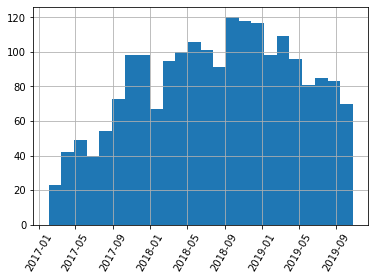

In [58]:
plt.xticks(rotation=60)
pd.to_datetime(index_visits['Dödsdatum'].dropna()).hist(bins=24)

In [17]:
index_visits.Dödsdatum

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
27554    NaN
27555    NaN
27556    NaN
27557    NaN
27558    NaN
Name: Dödsdatum, Length: 27559, dtype: object

In [23]:
deaths_alias = set(index_visits.loc[index_visits.Avliden, 'Alias'].unique())
deaths_dates = set(index_visits.set_index('Alias').Dödsdatum.dropna().index.unique())

print(
    len(deaths_alias),
    len(deaths_dates),
    len(deaths_alias | deaths_dates),
    len(deaths_alias & deaths_dates)
)
print(
    index_visits.Avliden.sum(),
    len(index_visits.Dödsdatum.dropna())
)

2066 2012 2066 2012
2068 2014


In [59]:
index_visits.Vardkontakt_InskrivningDatum

0        2017-02-18 19:24:00.0000000
1        2017-10-10 20:30:00.0000000
2        2017-03-03 02:26:00.0000000
3        2017-02-13 18:22:00.0000000
4        2017-07-26 15:07:00.0000000
                    ...             
27554    2018-11-30 11:32:00.0000000
27555    2018-11-30 11:38:00.0000000
27556    2018-11-30 19:50:00.0000000
27557    2018-11-30 18:08:00.0000000
27558    2018-11-30 23:11:00.0000000
Name: Vardkontakt_InskrivningDatum, Length: 27559, dtype: object

In [61]:
index_visits['Utskriven till'].value_counts()

Hemmet                  18549
Avdelning                8365
Sjukhus                   434
Avslutad                   86
Mottagning                 61
Avvikit efter läkbed       32
Avliden                    21
Primärvård                 11
Name: Utskriven till, dtype: int64

### Besöksorsaker

In [31]:
cols = ['BesokOrsakId', 'BesokOrsak_Kod', 'BesokOrsak_Beskrivning', 'Sjukhus_KortNamn', 'Sjukhus_Namn', 'AktuellSjukhusId']
index_visits[cols].drop_duplicates()

,BesokOrsakId,BesokOrsak_Kod,BesokOrsak_Beskrivning,Sjukhus_KortNamn,Sjukhus_Namn,AktuellSjukhusId
0,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",SUSLu,SUS Lund,O10001
4,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",HBG,Helsingborgs lasarett,SE162321000255-O12014
8,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",SUSMa,SUS Malmö,SE162321000255-O11414
11,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",CSK,Centralsjukhuset Kristianstad,SE162321000255-O10532
24,NaN,NaN,NaN,NaN,NaN,NaN
44,120.0,BröstSm,"Bröstsmärta/Bröstkorgssmärta UNS RETTS-A 5, Re...",YL,Ystads lasarett,SE162321000255-O16571


In [32]:
len(index_visits[cols]) - len(index_visits[cols].dropna(how='all'))

1010

In [33]:
len(index_visits)

27559

In [34]:
len(index_visits.Alias.unique())

27557

In [35]:
kompletterande = read_csv('/mnt/air-crypt/air-crypt-raw/andersb/data/ESC_TROP_KompletterandeBesöksorsakerFör_Vårdkontakt_InkluderadeIndexBesök_2017_2018.csv')

In [36]:
kompletterande

,KontaktId,BesokOrsakId,BesokOrsak_Kod,BesokOrsak_Beskrivning
0,K10000037,344,BröstrySm,Smärtor i bröstryggen RETTS-A 14
1,K10000067,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."
2,K10000077,239,AndnSm,"Bröstsmärta vid andning RETTS-A 4,RETTS-P 104"
3,K10000129,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."
4,K10000131,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."
...,...,...,...,...
1013,K10027382,344,BröstrySm,Smärtor i bröstryggen RETTS-A 14
1014,K10027415,344,BröstrySm,Smärtor i bröstryggen RETTS-A 14
1015,K10027509,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."
1016,K10027522,399,BröstkorgSm,"Bröstsmärta/Bröstkorgsmärta RETTS-A 5, RETTS-P..."


In [38]:
index_visits.Sjukhus_KortNamn.value_counts()

SUSMa    7445
SUSLu    6960
HBG      5498
CSK      4099
YL       2547
Name: Sjukhus_KortNamn, dtype: int64

## Labanalyssvar
File: ESC_TROP_LabAnalysSvar_InkluderadeIndexBesök_2017_2018

In [62]:
lab = read_csv(paths[5])

In [63]:
lab.dtypes

KontaktId                       object
Alias                           object
Analyssvar_ProvtagningDatum     object
Analyssvar_MottagetDatum        object
Labanalys_Beskrivning           object
Labanalys_Namn                  object
Analyssvar_Varde                object
Analyssvar_Enhet                object
Analyssvar_ReferensvardeMin    float64
Analyssvar_ReferensvardeMax    float64
dtype: object

In [67]:
lab

,KontaktId,Alias,Analyssvar_ProvtagningDatum,Analyssvar_MottagetDatum,Labanalys_Beskrivning,Labanalys_Namn,Analyssvar_Varde,Analyssvar_Enhet,Analyssvar_ReferensvardeMin,Analyssvar_ReferensvardeMax
0,K10003496,{16B4F935-A85A-4E58-B09C-B8DD318FCEA5},2017-04-06 11:50:00.0000000,2017-04-06 12:04:14.0000000,P-Anjongap (exkl K+),P-Anjongap,9,mmol/L,6.00,10.0
1,K10003496,{16B4F935-A85A-4E58-B09C-B8DD318FCEA5},2017-04-06 11:50:00.0000000,2017-04-06 12:04:14.0000000,vB-pO2 (37°C),vB-pO2 (37,2.7,kPa,NaN,NaN
2,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:24:00.0000000,P-CRP,P-CRP,3.4,mg/L,NaN,3.0
3,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:28:01.0000000,P-ASAT,P-ASAT,HEMOL,µkat/L,0.25,0.6
4,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:40:00.0000000,2018-07-22 23:54:00.0000000,P-Anjongap (exkl K+),P-Anjongap,12,mmol/L,6.00,10.0
...,...,...,...,...,...,...,...,...,...,...
601758,K10027517,{3873F6DE-4850-4D9B-B038-B5583CB1C245},2018-11-30 00:30:00.0000000,2018-11-30 00:34:02.0000000,P-Standardbikarbonat,P-Standard,25,mmol/L,22.00,27.0
601759,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:40:00.0000000,2018-11-30 06:46:05.0000000,P-Natrium,P-Natrium,142,mmol/L,137.00,145.0
601760,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:40:00.0000000,2018-11-30 06:46:05.0000000,vB-Oxygenmättnad,vB-Oxygenm,73,%,NaN,NaN
601761,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:50:00.0000000,2018-11-30 07:46:01.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0


In [71]:
lab[lab.Labanalys_Namn.str.match('.*Troponin.*', case=False)].Labanalys_Beskrivning.value_counts()

P-Troponin T    41922
Name: Labanalys_Beskrivning, dtype: int64

In [89]:
#lab['value']
lab['value'] = np.nan
lab.loc[lab.Analyssvar_Varde.str.match('<5'), 'value'] = 4
lab['value']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
601758    NaN
601759    NaN
601760    NaN
601761    4.0
601762    NaN
Name: value, Length: 601763, dtype: float64

In [95]:
lab['value'] = lab['value'].fillna(pd.to_numeric(lab.Analyssvar_Varde, errors='coerce'))

In [108]:
num_troponin_values = lab.loc[lab.Labanalys_Namn.str.match('P-Troponin')].dropna(subset=['value'])['Alias'].value_counts()

In [111]:
lab = lab.join(num_troponin_values.rename('troponin_count'), on='Alias', how='left').fillna(0)

In [114]:
len(lab.loc[lab['troponin_count'] >= 2, 'Alias'].unique())

11661

<AxesSubplot:>

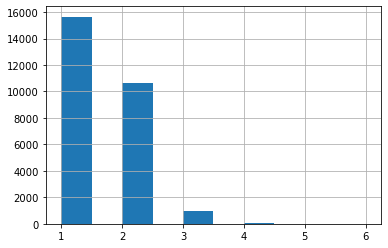

In [106]:
lab.loc[lab.Labanalys_Namn.str.match('P-Troponin')].dropna(subset=['value'])['Alias'].value_counts().hist()

In [102]:
lab

,KontaktId,Alias,Analyssvar_ProvtagningDatum,Analyssvar_MottagetDatum,Labanalys_Beskrivning,Labanalys_Namn,Analyssvar_Varde,Analyssvar_Enhet,Analyssvar_ReferensvardeMin,Analyssvar_ReferensvardeMax,value
0,K10003496,{16B4F935-A85A-4E58-B09C-B8DD318FCEA5},2017-04-06 11:50:00.0000000,2017-04-06 12:04:14.0000000,P-Anjongap (exkl K+),P-Anjongap,9,mmol/L,6.00,10.0,9.0
1,K10003496,{16B4F935-A85A-4E58-B09C-B8DD318FCEA5},2017-04-06 11:50:00.0000000,2017-04-06 12:04:14.0000000,vB-pO2 (37°C),vB-pO2 (37,2.7,kPa,NaN,NaN,2.7
2,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:24:00.0000000,P-CRP,P-CRP,3.4,mg/L,NaN,3.0,3.4
3,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:28:01.0000000,P-ASAT,P-ASAT,HEMOL,µkat/L,0.25,0.6,NaN
4,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:40:00.0000000,2018-07-22 23:54:00.0000000,P-Anjongap (exkl K+),P-Anjongap,12,mmol/L,6.00,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
601758,K10027517,{3873F6DE-4850-4D9B-B038-B5583CB1C245},2018-11-30 00:30:00.0000000,2018-11-30 00:34:02.0000000,P-Standardbikarbonat,P-Standard,25,mmol/L,22.00,27.0,25.0
601759,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:40:00.0000000,2018-11-30 06:46:05.0000000,P-Natrium,P-Natrium,142,mmol/L,137.00,145.0,142.0
601760,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:40:00.0000000,2018-11-30 06:46:05.0000000,vB-Oxygenmättnad,vB-Oxygenm,73,%,NaN,NaN,73.0
601761,K10027524,{C15A0B92-0613-4524-86B5-C86C5EBB6693},2018-11-30 06:50:00.0000000,2018-11-30 07:46:01.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0,4.0


In [78]:
foo = lab[lab.Labanalys_Namn.str.match('.*Troponin.*', case=False)]
foo[foo.Analyssvar_Varde.str.match('[^0-9]')].Analyssvar_Varde.value_counts()

<5       12558
KOMM      1806
FELTA       23
SAKNA        9
HEMOL        2
.....        1
Name: Analyssvar_Varde, dtype: int64

In [97]:
foo

,KontaktId,Alias,Analyssvar_ProvtagningDatum,Analyssvar_MottagetDatum,Labanalys_Beskrivning,Labanalys_Namn,Analyssvar_Varde,Analyssvar_Enhet,Analyssvar_ReferensvardeMin,Analyssvar_ReferensvardeMax
25,K10021557,{9091796B-7D63-4D21-9462-8D8AC403B2B5},2018-07-09 21:50:00.0000000,2018-07-09 22:40:02.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0
29,K10008182,{AE1BC720-A157-4D6B-B6C3-2BC9684B527B},2017-07-17 20:00:00.0000000,2017-07-17 21:04:02.0000000,P-Troponin T,P-Troponin,13,ng/L,NaN,15.0
38,K10005999,{8D13015C-B100-4E8F-9694-8FB42E2AFEF8},2017-05-28 19:00:00.0000000,2017-05-28 19:54:03.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0
59,K10022004,{6A0D6809-58F5-45AA-8844-D7B9BEFA928A},2018-07-22 23:10:00.0000000,2018-07-23 00:30:01.0000000,P-Troponin T,P-Troponin,KOMM,ng/L,NaN,NaN
64,K10000225,{C7E576A0-6DD5-49EE-994D-86075D8EC66A},2017-02-04 15:30:00.0000000,2017-02-04 16:22:07.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...
601704,K10027255,{53460095-F57D-4F27-B478-C68FEBB459BB},2018-11-22 20:00:00.0000000,2018-11-22 21:08:01.0000000,P-Troponin T,P-Troponin,7,ng/L,NaN,15.0
601718,K10027285,{DB198F6D-8D6D-4C87-AFF4-4BBF286F7CAB},2018-11-23 23:00:00.0000000,2018-11-23 23:50:00.0000000,P-Troponin T,P-Troponin,9,ng/L,NaN,15.0
601722,K10027291,{68C51D8A-E8D9-4393-83A0-8F1DBBD0AD31},2018-11-24 06:00:00.0000000,2018-11-24 06:50:05.0000000,P-Troponin T,P-Troponin,19,ng/L,NaN,15.0
601744,K10027430,{82DDEC30-D8DF-48B7-8E52-86361F989C28},2018-11-27 21:20:00.0000000,2018-11-27 22:08:00.0000000,P-Troponin T,P-Troponin,<5,ng/L,NaN,15.0


In [64]:
len(lab)

601763

In [66]:
len(lab.Alias.unique())

27557

## Patients


In [115]:
lund_paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-Lund-2019-09-23/Strukturerad data/*.csv')))
hbg_paths = list(sorted(glob.iglob(
    '/mnt/air-crypt/air-crypt-expect/andersb/data/Expect-HBG-2019-12-04/csv_filer/*.csv')))

lu_ed = read_csv(lund_paths[4])
lu_patients = pd.DataFrame(lu_ed.Alias.drop_duplicates()).set_index('Alias')
lu_patients['Lund'] = True

hbg_ed = read_csv(hbg_paths[1])
hbg_patients = pd.DataFrame(hbg_ed.Alias.drop_duplicates()).set_index('Alias')
hbg_patients['Helsingborg'] = True

patients = lu_patients.join(hbg_patients, how='outer').fillna(False)

In [116]:
lu_demografi = read_csv(lund_paths[1])
#lu_birthyear = lu_demografi.dropna(subset=['Alias']).set_index('Alias').foedaar.rename('birthyear')
#lu_birthyear
lu_demografi = (
    lu_demografi
    .dropna(subset=['Alias'])
    .set_index('Alias')[['foedaar', 'kon']]
    .rename(columns={'foedaar': 'birthyear', 'kon': 'sex'})
)

In [117]:
hbg_demografi = read_csv(hbg_paths[2])
hbg_demografi = (
    hbg_demografi.dropna(subset=['Alias', 'fdag'], how='any')
    .set_index('Alias')[['fdag', 'kon']]
    .rename(columns={'fdag': 'birthyear', 'kon': 'sex'})
)
hbg_demografi.birthyear = pd.to_datetime(hbg_demografi.birthyear, format="%d%b%Y").dt.strftime("%Y").astype(int)
hbg_demografi

,birthyear,sex
Alias,,
{27B71380-F1B8-4DAD-B9C9-D16EB71B23DA},1966,1.0
{046C6BA3-914D-4A3D-BE51-40A375CECACA},1935,1.0
{9827D0B4-AFAC-4D06-9BCF-A3610B8486C2},1916,1.0
{746396ED-6F99-494D-9D02-F7C549038566},1968,0.0
{CBAC2A20-A57A-4B2F-A40D-C728CA749CF3},1920,1.0
...,...,...
{A8C11BED-1C44-4189-A204-D829546947DD},1995,0.0
{7295FFB3-A294-4FD5-BF1F-7D1BC4AFD67E},1995,0.0
{CA190E67-8267-4E3A-8B30-918DD233D3C3},1995,1.0


In [118]:
patients = patients.join(lu_demografi, how='left').fillna(hbg_demografi)
patients

,Lund,Helsingborg,birthyear,sex
Alias,,,,
{000090D0-D4D2-4C93-B3DF-21BDD488C63A},True,False,1943.0,0.0
{0000DC49-AE86-4F86-9C3F-12F19F135FBE},True,False,1947.0,0.0
{0000EC99-5DD2-49B2-85BD-79DDD8C093D9},False,True,1991.0,1.0
{0000F3B6-DBD2-4A9B-BF13-AB782407A5B9},True,False,1965.0,1.0
{0001926B-39C8-4E1C-AC3D-D7DE67DDC25E},True,False,1976.0,1.0
...,...,...,...,...
{FFFEE8B9-9FA2-420B-88EF-756E1F8559FC},False,True,1960.0,1.0
{FFFF226F-CDAC-4595-937D-8CEE396BC6D4},True,False,1925.0,0.0
{FFFF8D86-1396-4A70-A908-C50786840CAF},True,False,1967.0,0.0


In [121]:
esc_trop_patients = set(index_visits.Alias.unique())
expect_patients = set(patients.index.unique())

In [122]:
print(
    len(esc_trop_patients),
    len(expect_patients),
    len(esc_trop_patients & expect_patients)
)

27557 197601 7209


## LaTeX

$$c = \sqrt{a^2 + b^2}$$

## Plotting

In [3]:
d = {'foo' : [1, 1, 2, 3, 5, 8] }
df = pd.DataFrame(data = d)


### Histogram

Text(0.5, 0, 'Occurrence')

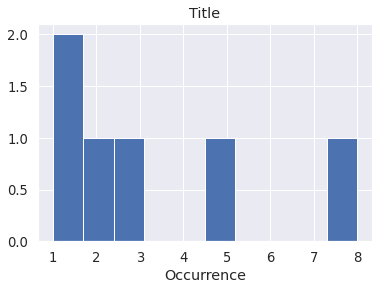

In [4]:
sns.set(font_scale=1.2)
df.hist()
plt.title("Title")
plt.xlabel("Occurrence")
#for saving
#plt.savefig("A good description", dpi = 200)

### Line diagram

Text(0, 0.5, 'The y label')

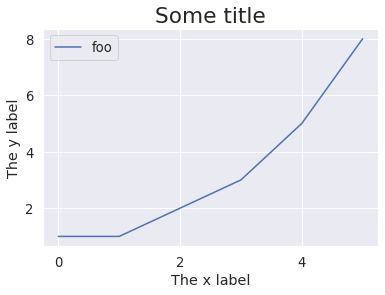

In [5]:
df.plot(label = "A label")
sns.set(font_scale=1.8)  
plt.title("Some title")
plt.xlabel("The x label")
plt.ylabel("The y label")

## Results

## Discussion

## Suggestion for further work

## References
Structure of a technical report https://unilearning.uow.edu.au/report/3b.html

## Appendix